In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 581.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [7]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [8]:
input_shape = (28, 28, 1)
latent_dim = 128

# Encoder
inputs = Input(shape=input_shape)
x = Conv2D(32, kernel_size=3, strides=2, activation='relu', padding='same')(inputs)
x = Conv2D(64, kernel_size=3, strides=2, activation='relu', padding='same')(x)
x = Flatten()(x)
latent_repr = Dense(latent_dim)(x)

# Decoder
x = Dense(7 * 7 * 64)(latent_repr)
x = Reshape((7, 7, 64))(x)
x = Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same')(x)
decoded = Conv2DTranspose(1, kernel_size=3, strides=2, activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = Model(inputs, decoded)

In [9]:
autoencoder.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy')

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
epochs = 20
batch_size = 128

history = autoencoder.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test),
                          epochs=epochs, batch_size=batch_size, callbacks=[early_stopping])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 99ms/step - loss: 0.3733 - val_loss: 0.2078
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.1783 - val_loss: 0.1339
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.1300 - val_loss: 0.1167
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.1162 - val_loss: 0.1097
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.1096 - val_loss: 0.1055
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.1056 - val_loss: 0.1026
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.1027 - val_loss: 0.1004
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.1002 - val_loss: 0.0990
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - loss: 0.0989 - val_loss: 0.0979
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.0976 - val_loss: 0.0970
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - loss: 0.0969 - val_loss: 0.0964
Epoch 12/20
469/469 ━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


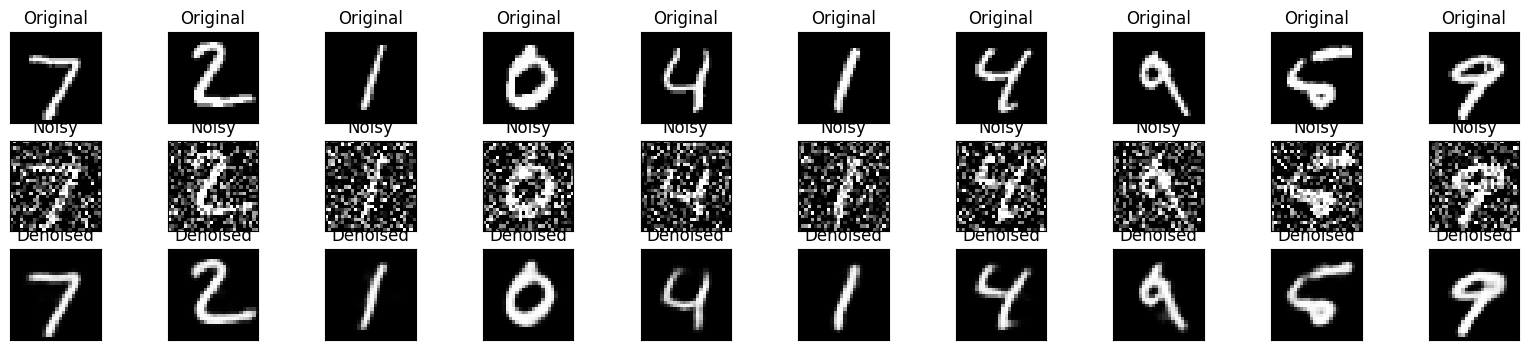

In [12]:
denoised_test_images = autoencoder.predict(x_test_noisy)

# Display original, noisy, and denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised images
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(denoised_test_images[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
# on récupère les données dans 4 arrays
(train_img, train_lbl), (test_img, test_lbl)=mnist.load_data()
train_img.shape

(60000, 28, 28)

In [14]:
train_lbl[800]

np.uint8(9)

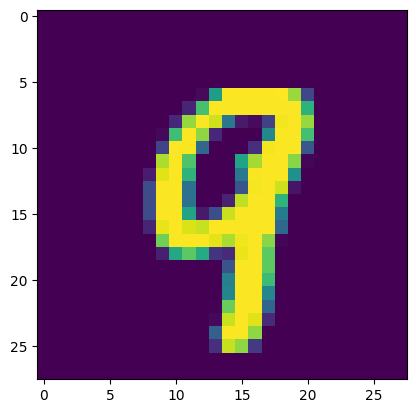

In [15]:
plt.imshow(train_img[800])

In [16]:
img_acp=train_img.reshape(train_img.shape[0],-1)
pca=PCA(n_components=.80)
donnees_reduites=pca.fit_transform(img_acp)
# Pour capturer 80% de l’information, on utiliser 43 des 784 composantes
# on projette les données réduites dans l’espace d’origine
projection=pca.inverse_transform(donnees_reduites)

Text(0.5, 1.0, '80.0% de variance expliquée')

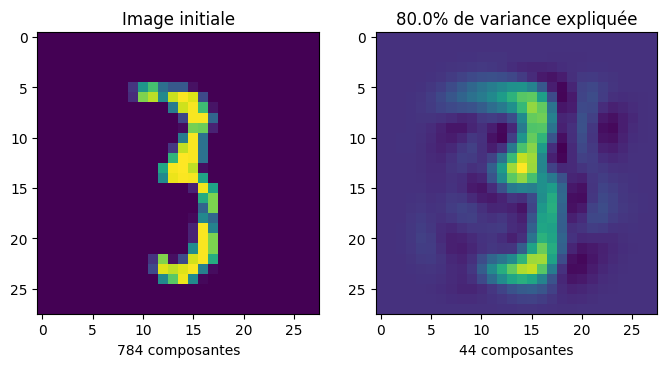

In [17]:
# on affiche les résultats
plt.figure(figsize=(8,4));
# image initale
plt.subplot(1, 2, 1);
plt.imshow(img_acp[22000].reshape(28,28))
plt.xlabel('%i composantes'%(img_acp.shape[1]))
plt.title('Image initiale');
# image basée sur l’ACP
plt.subplot(1, 2, 2);
plt.imshow(projection[22000].reshape(28, 28))
plt.xlabel('%i composantes' %(donnees_reduites.shape[1]))
plt.title('%s de variance expliquée'%(str(pca.n_components*100)+"%"))

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets

In [19]:
# génération des données
n_points = 1000
X, color = datasets.make_swiss_roll(n_points)
n_neighbors = 10
n_components = 2

In [20]:

# projection vers un espace à deux dimensions
x_acp = PCA(n_components).fit_transform(X)

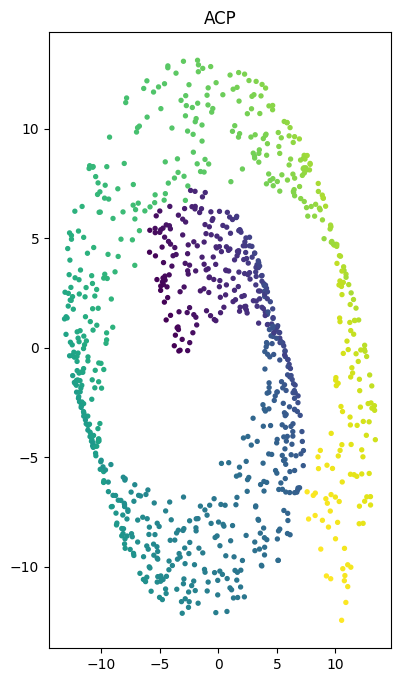

In [21]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(131)
plt.title("ACP")
plt.scatter(x_acp[:, 0], x_acp[:, 1], c=color, s=8)

Image 1, k=10: PSNR = 14.46 dB
Image 2, k=10: PSNR = 14.84 dB
Image 3, k=10: PSNR = 15.71 dB
Image 4, k=10: PSNR = 15.36 dB
Image 5, k=10: PSNR = 15.14 dB
Image 1, k=30: PSNR = 14.46 dB
Image 2, k=30: PSNR = 14.84 dB
Image 3, k=30: PSNR = 15.71 dB
Image 4, k=30: PSNR = 15.36 dB
Image 5, k=30: PSNR = 15.14 dB
Image 1, k=50: PSNR = 14.46 dB
Image 2, k=50: PSNR = 14.84 dB
Image 3, k=50: PSNR = 15.71 dB
Image 4, k=50: PSNR = 15.36 dB
Image 5, k=50: PSNR = 15.14 dB
Image 1, k=100: PSNR = 14.46 dB
Image 2, k=100: PSNR = 14.84 dB
Image 3, k=100: PSNR = 15.71 dB
Image 4, k=100: PSNR = 15.36 dB
Image 5, k=100: PSNR = 15.14 dB
Image 1, k=200: PSNR = 14.46 dB
Image 2, k=200: PSNR = 14.84 dB
Image 3, k=200: PSNR = 15.71 dB
Image 4, k=200: PSNR = 15.36 dB
Image 5, k=200: PSNR = 15.14 dB
Image 1, k=784: PSNR = 14.46 dB
Image 2, k=784: PSNR = 14.84 dB
Image 3, k=784: PSNR = 15.71 dB
Image 4, k=784: PSNR = 15.36 dB
Image 5, k=784: PSNR = 15.14 dB


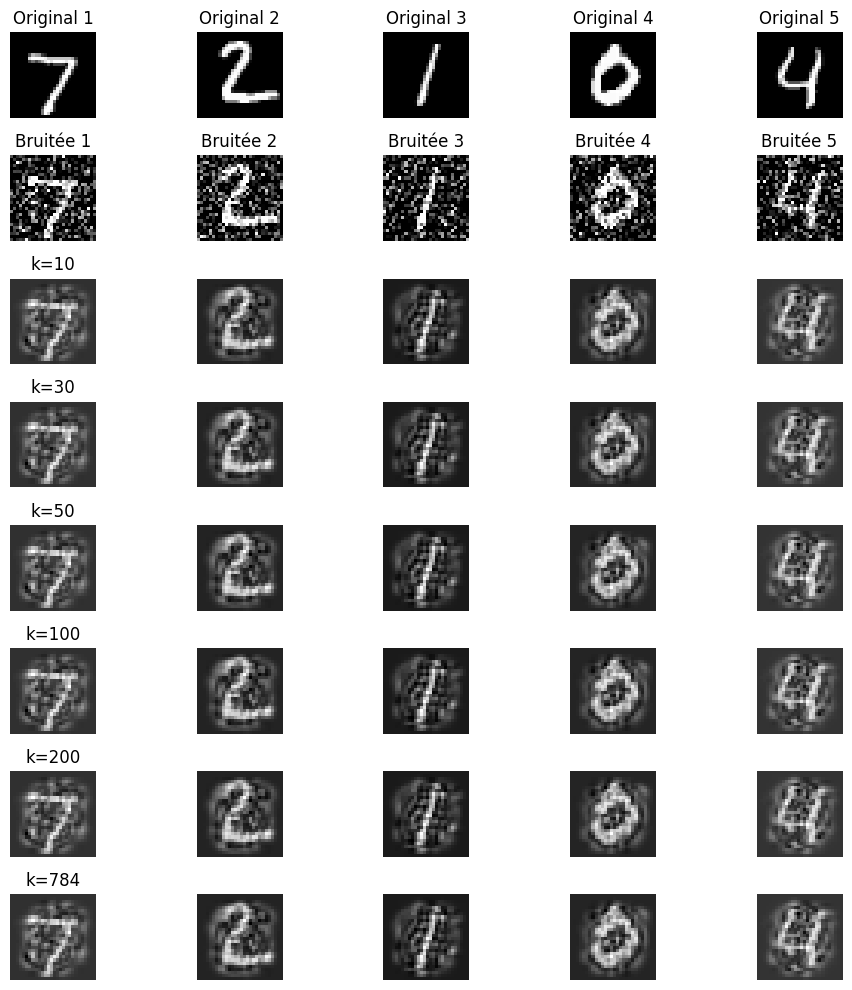

In [27]:
x_test = x_test / 255.0
noise_factor = 0.4
noisy_images = x_test[:5] + noise_factor * np.random.normal(size=x_test[:5].shape)
noisy_images = np.clip(noisy_images, 0., 1.)
x_test_flat = x_test.reshape(-1, 784)
noisy_images_flat = noisy_images.reshape(5, -1)
k_values = [10, 30, 50, 100, 200, 784]
def psnr(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1.0
    return 10 * np.log10((max_pixel ** 2) / mse)
fig, axes = plt.subplots(len(k_values) + 2, 5, figsize=(10, 10))
for i in range(5):
    axes[0, i].imshow(x_test[i], cmap='gray')
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis("off")
for i in range(5):
    axes[1, i].imshow(noisy_images[i], cmap='gray')
    axes[1, i].set_title(f"Bruitée {i+1}")
    axes[1, i].axis("off")
for row, k in enumerate(k_values):
    pca = PCA(n_components=200)
    pca.fit(x_test_flat)
    reconstructed_images_flat = pca.inverse_transform(pca.transform(noisy_images_flat))
    reconstructed_images = reconstructed_images_flat.reshape(5, 28, 28)

    for col in range(5):
        axes[row + 2, col].imshow(reconstructed_images[col], cmap='gray')
        axes[row + 2, col].set_title(f"k={k}" if col == 0 else "")
        axes[row + 2, col].axis("off")

    # Calculer le PSNR pour chaque image reconstruite
    for i in range(5):
        psnr_value = psnr(x_test[i], reconstructed_images[i])
        print(f"Image {i+1}, k={k}: PSNR = {psnr_value:.2f} dB")

plt.tight_layout()
plt.show()
